In [1]:
import numpy as np
from scipy.optimize import minimize

import dynesty
from dynesty import plotting as dyplot

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=18)
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', serif='palatino')


In [2]:
np.random.seed(123)

# Choose the "true" parameters.
a_true = 4.294
b_true = -0.9594
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = a_true + b_true*x
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

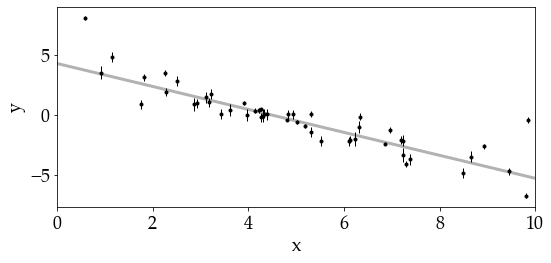

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,4), tight_layout=True)

ax.errorbar(x, y, yerr=yerr, fmt='.k', capsize=0, lw=1)

x0 = np.linspace(0, 10, 500)
ax.plot(x0, a_true + b_true*x0, 'k', alpha=0.3, lw=3)
ax.set(xlim=(0,10), xlabel='x', ylabel='y');

#fig.savefig('linear-model.pdf')

In [4]:
# log-likelihood
def loglike(theta):
    a, b, lnf = theta
    model = a + b*x
    inv_sigma2 = 1.0 / (yerr**2 + model**2 * np.exp(2 * lnf))
    
    return -0.5 * (np.sum((y-model)**2 * inv_sigma2 - np.log(inv_sigma2)))

# prior transform
def prior_transform(utheta):
    ua, ub, ulf = utheta
    a = 10. * ua
    b = 5.5 * ub - 5.
    lnf = 11. * ulf - 10.
    
    return a, b, lnf

In [5]:
dsampler = dynesty.DynamicNestedSampler(loglike, prior_transform, ndim=3,
                                        bound='multi', sample='rstagger')
dsampler.run_nested()
dres = dsampler.results

21059it [02:35, 135.48it/s, batch: 9 | bound: 204 | nc: 25 | ncall: 486438 | eff(%):  4.329 | loglstar: -18.554 < -12.192 < -12.942 | logz: -23.533 +/-  0.191 | stop:  0.933]        


In [6]:
dres

         niter: 21059
         ncall: array([1, 1, 1, ..., 1, 1, 1])
           eff: 4.329225923961532
       samples: array([[ 2.45130592, -4.92762093, -9.73436754],
       [ 0.07737514, -4.53347747, -7.51951749],
       [ 1.93054717, -4.75178425, -8.11934229],
       ...,
       [ 4.50980013, -0.99877919, -0.78149855],
       [ 4.53650415, -1.00424823, -0.79636134],
       [ 4.53078816, -1.0038748 , -0.78513436]])
    samples_id: array([ 79,  28, 271, ...,  92, 455, 287])
 samples_batch: array([0, 0, 0, ..., 0, 0, 0])
    samples_it: array([   0,    0,    0, ..., 7060, 7774, 7937])
     samples_u: array([[0.24513059, 0.01315983, 0.02414841],
       [0.00773751, 0.08482228, 0.22549841],
       [0.19305472, 0.04513014, 0.17096888],
       ...,
       [0.45098001, 0.72749469, 0.83804559],
       [0.45365042, 0.72650032, 0.83669442],
       [0.45307882, 0.72656822, 0.83771506]])
     samples_n: array([500, 500, 500, ...,   3,   2,   1])
         logwt: array([-2.16662419e+05, -2.15474772

In [11]:
type(dres)

dynesty.results.Results

In [10]:
dres['samples']

array([[ 2.45130592, -4.92762093, -9.73436754],
       [ 0.07737514, -4.53347747, -7.51951749],
       [ 1.93054717, -4.75178425, -8.11934229],
       ...,
       [ 4.50980013, -0.99877919, -0.78149855],
       [ 4.53650415, -1.00424823, -0.79636134],
       [ 4.53078816, -1.0038748 , -0.78513436]])

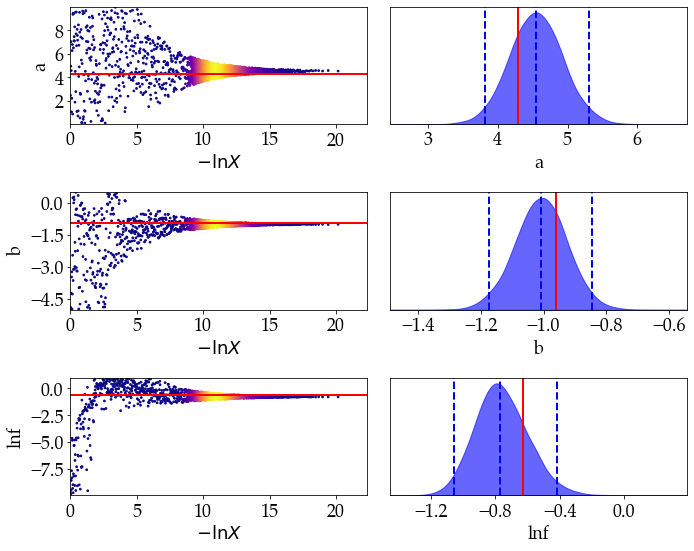

In [8]:
truths = [a_true, b_true, np.log(f_true)]
labels = ['a','b','lnf']
fig, axes = dyplot.traceplot(dsampler.results, truths=truths, labels=labels,
                             fig=plt.subplots(3, 2, figsize=(10,8)),
                             thin=10)
fig.tight_layout();

#fig.savefig('linear-model-traceplot.pdf')

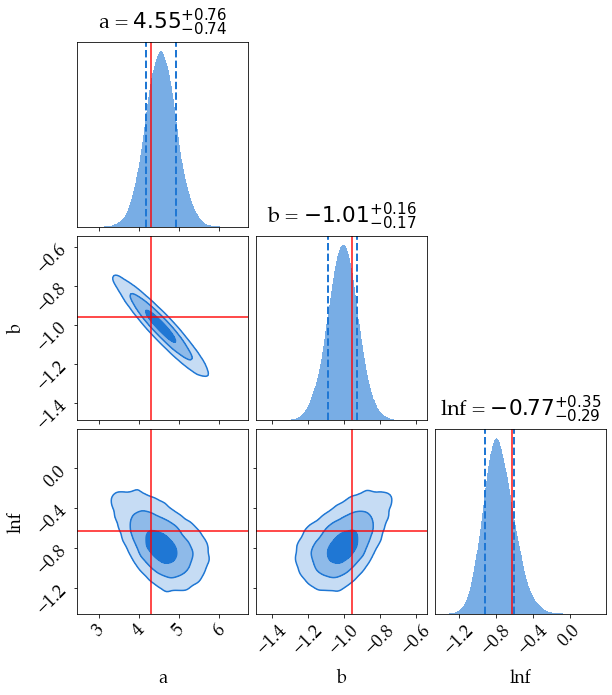

In [9]:
fig, axes = dyplot.cornerplot(dres, truths=truths, show_titles=True, 
                              title_kwargs={'y': 1.04}, labels=labels,
                              quantiles_2d=[1-np.exp(-0.5*r**2) for r in [1.,2.,3.]],
                              quantiles=(0.16, 0.84),
                              fig=plt.subplots(3, 3, figsize=(9,10)),
                              color='#1f77d4')

fig.subplots_adjust(top=0.925)
#fig.savefig('linear-model-corner.pdf')